# Symptoms Disease Prediction Model

###  $ Developer - Omal Bharuka $ 

<br> 

- This notebook in-order to predict  diseases from the given symptoms. <br> 
- It shows the step by step process to build a model. <br> 
- It also contains Visualization of decision tree. <br> 
- The tree model was choosed based on the data-set as it only  __0 and 1__  only. <br> 
- Tree models are consider the best for such kind of data.<br> 

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("Training.csv")

In [3]:
df = df.sample(frac=1,random_state=15).reset_index(drop=True)

In [4]:
df.head(10)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Hepatitis D
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Hepatitis E
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Paralysis (brain hemorrhage)
3,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Typhoid
5,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Hepatitis D
6,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
7,0,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Dengue
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Dimorphic hemmorhoids(piles)
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Hypothyroidism


In [5]:
len(df.columns)

133

In [6]:
l1=df.columns
l1.values

array(['itching', 'skin_rash', 'nodal_skin_eruptions',
       'continuous_sneezing', 'shivering', 'chills', 'joint_pain',
       'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting',
       'vomiting', 'burning_micturition', 'spotting_ urination',
       'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets',
       'mood_swings', 'weight_loss', 'restlessness', 'lethargy',
       'patches_in_throat', 'irregular_sugar_level', 'cough',
       'high_fever', 'sunken_eyes', 'breathlessness', 'sweating',
       'dehydration', 'indigestion', 'headache', 'yellowish_skin',
       'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes',
       'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea',
       'mild_fever', 'yellow_urine', 'yellowing_of_eyes',
       'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach',
       'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision',
       'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_press

In [7]:
l2=[]
for x in range(0,len(l1)-1):
    l2.append(0)

In [8]:
disease=df["prognosis"].unique()

In [9]:
disease

array(['Hepatitis D', 'Hepatitis E', 'Paralysis (brain hemorrhage)',
       'GERD', 'Typhoid', 'Allergy', 'Dengue',
       'Dimorphic hemmorhoids(piles)', 'Hypothyroidism', 'Varicose veins',
       'Pneumonia', 'Malaria', 'Hyperthyroidism', 'Arthritis',
       'Drug Reaction', 'Chicken pox', 'Fungal infection',
       'Alcoholic hepatitis', 'Cervical spondylosis', 'Heart attack',
       'Hepatitis B', 'Chronic cholestasis', 'Acne', 'Tuberculosis',
       'Diabetes ', 'Hypoglycemia', 'Jaundice',
       '(vertigo) Paroymsal  Positional Vertigo', 'Osteoarthristis',
       'Common Cold', 'Urinary tract infection', 'Migraine',
       'Peptic ulcer diseae', 'Psoriasis', 'Hepatitis C',
       'Gastroenteritis', 'Hypertension ', 'AIDS', 'Impetigo',
       'hepatitis A', 'Bronchial Asthma'], dtype=object)

In [10]:
df["prognosis"].nunique()

41

### Label Encoding Disease (Prognosis) column

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df["prognosis"])

LabelEncoder()

In [12]:
diction = dict(zip(le.transform(le.classes_) , le.classes_ ))
diction

{0: '(vertigo) Paroymsal  Positional Vertigo',
 1: 'AIDS',
 2: 'Acne',
 3: 'Alcoholic hepatitis',
 4: 'Allergy',
 5: 'Arthritis',
 6: 'Bronchial Asthma',
 7: 'Cervical spondylosis',
 8: 'Chicken pox',
 9: 'Chronic cholestasis',
 10: 'Common Cold',
 11: 'Dengue',
 12: 'Diabetes ',
 13: 'Dimorphic hemmorhoids(piles)',
 14: 'Drug Reaction',
 15: 'Fungal infection',
 16: 'GERD',
 17: 'Gastroenteritis',
 18: 'Heart attack',
 19: 'Hepatitis B',
 20: 'Hepatitis C',
 21: 'Hepatitis D',
 22: 'Hepatitis E',
 23: 'Hypertension ',
 24: 'Hyperthyroidism',
 25: 'Hypoglycemia',
 26: 'Hypothyroidism',
 27: 'Impetigo',
 28: 'Jaundice',
 29: 'Malaria',
 30: 'Migraine',
 31: 'Osteoarthristis',
 32: 'Paralysis (brain hemorrhage)',
 33: 'Peptic ulcer diseae',
 34: 'Pneumonia',
 35: 'Psoriasis',
 36: 'Tuberculosis',
 37: 'Typhoid',
 38: 'Urinary tract infection',
 39: 'Varicose veins',
 40: 'hepatitis A'}

In [13]:
le.inverse_transform([2])

array(['Acne'], dtype=object)

In [14]:
df["prognosis"] = le.transform(df["prognosis"])

In [15]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,21
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,22
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,32
3,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,16
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,37


In [16]:
X= df.iloc[:,:-1]
X.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
y = df[["prognosis"]]
np.ravel(y)
y.head()

,prognosis
0,21
1,22
2,32
3,16
4,37


In [18]:
tr=pd.read_csv("Testing.csv")

In [19]:
tr = tr.sample(frac=1,random_state=15).reset_index(drop=True)

In [20]:
tr.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Hypothyroidism
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Hepatitis B
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chicken pox
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Hyperthyroidism
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Alcoholic hepatitis


In [21]:
tr["prognosis"] = le.transform(tr["prognosis"])

In [22]:
X_test= tr.iloc[:,:-1]
X_test.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
y_test = tr[["prognosis"]]
np.ravel(y_test)
y_test.head()

,prognosis
0,26
1,19
2,8
3,24
4,3


# Build and Training Model

In [24]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=5,random_state=11)
dt.fit(X,np.ravel(y))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=11, splitter='best')

### Visualizing Decision Tree

In [25]:
from sklearn import tree 
from sklearn.tree import export_graphviz
export_graphviz(dt, out_file='tree.dot', feature_names=X.columns)

In [26]:
!dot -Tpng tree.dot > tree.png

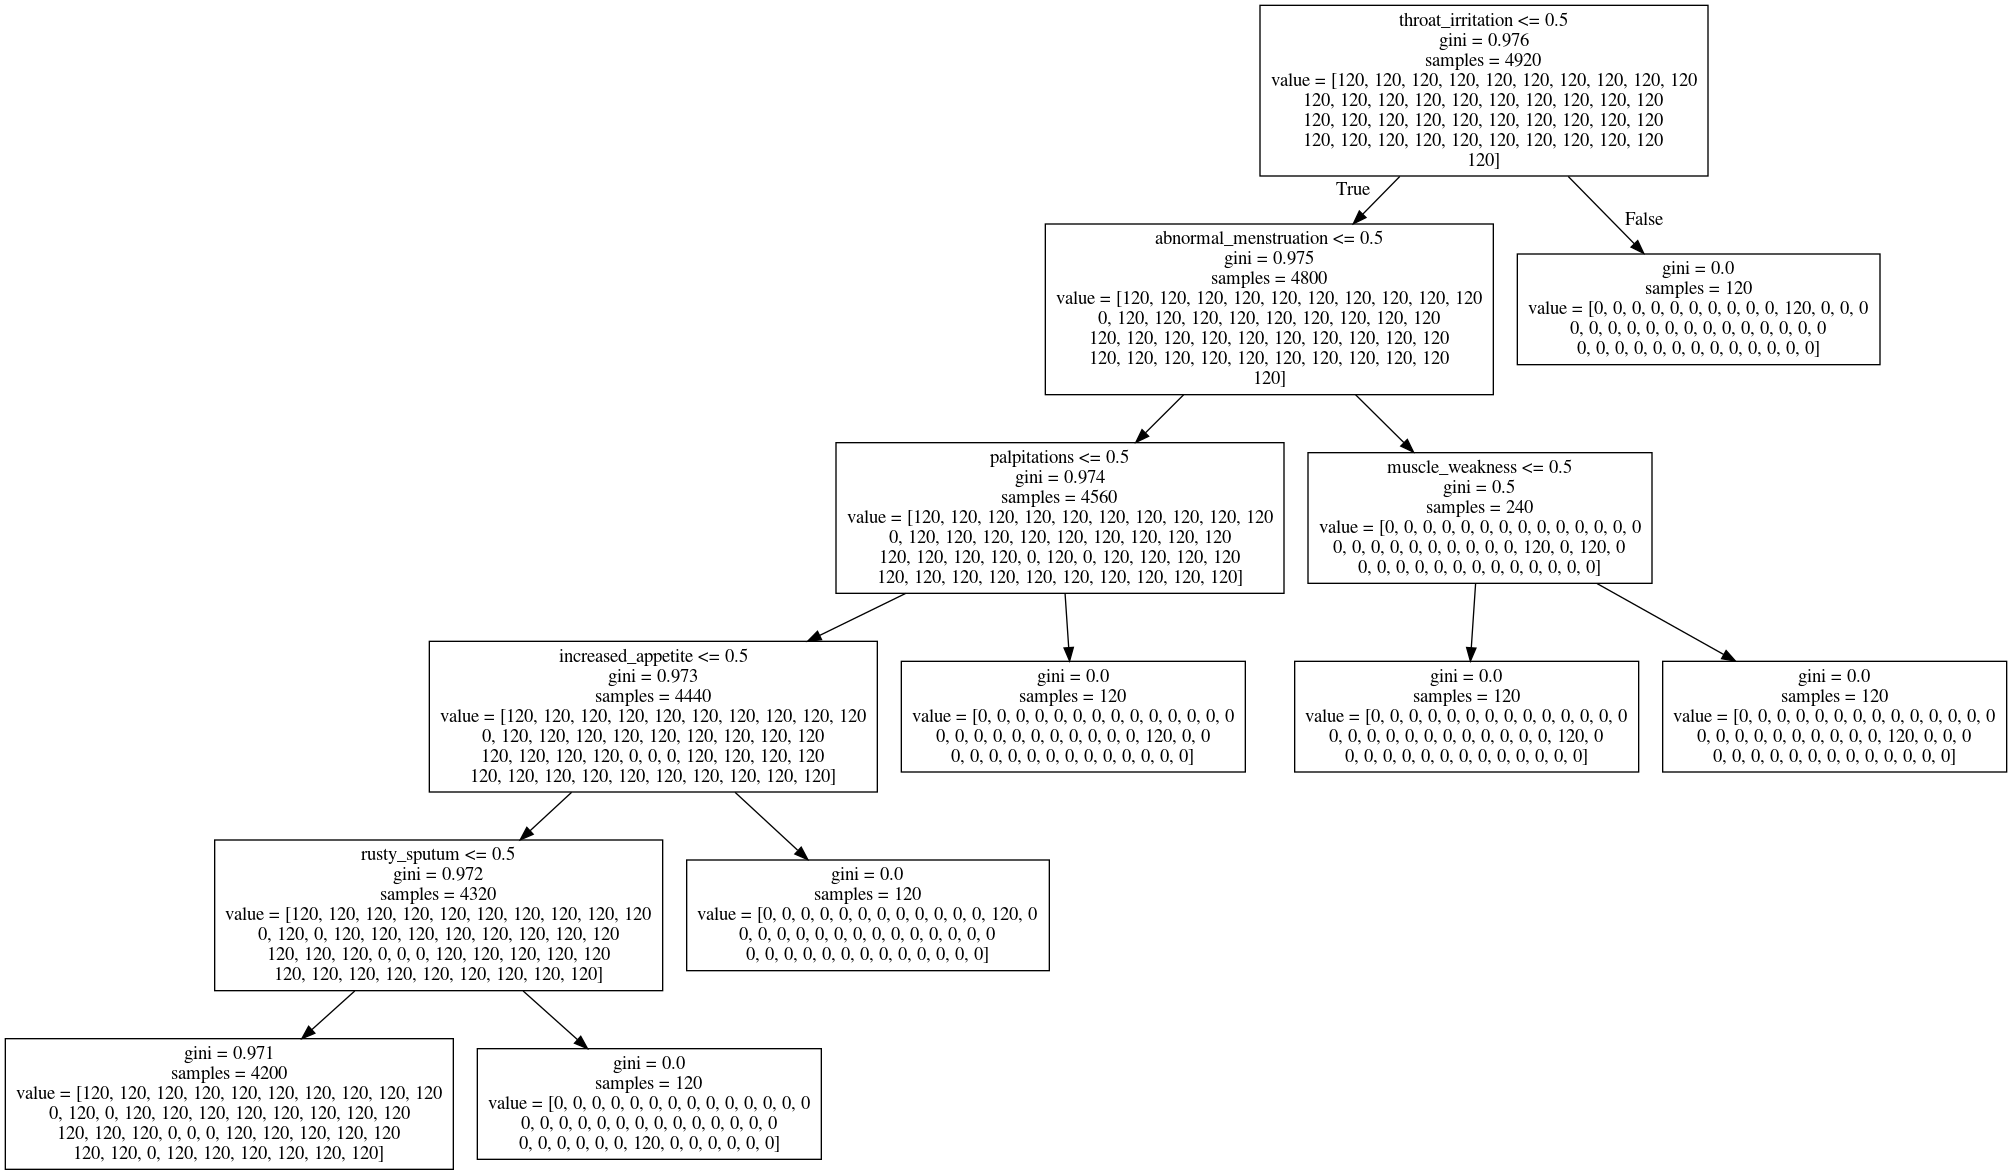

In [27]:
from IPython.display import Image
Image(filename='tree.png')

In [28]:
from sklearn.ensemble import RandomForestClassifier 
rf = RandomForestClassifier(n_estimators=85,max_depth=3,oob_score=True,random_state=11)
rf.fit(X,np.ravel(y))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=85,
                       n_jobs=None, oob_score=True, random_state=11, verbose=0,
                       warm_start=False)

In [29]:
rd=RandomForestClassifier(oob_score=True,random_state=11)
para = {
    'max_depth':[5,6,7,8],
    'n_estimators': [200,300,400,500,700,1000]
}

## Hyper parameter tuning

In [30]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(rd , para , n_jobs=3 , verbose=5)

In [31]:
grid.fit(X,np.ravel(y))

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:   11.2s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:  1.3min
[Parallel(n_jobs=3)]: Done 120 out of 120 | elapsed:  2.4min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=True, random_state=11,
                                

In [32]:
grid.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=None, oob_score=True, random_state=11, verbose=0,
                       warm_start=False)

In [33]:
grid.best_score_

1.0

In [34]:
grid.best_index_

4

## Fitting Best model

In [35]:
rf = RandomForestClassifier(n_estimators=700,max_depth=5,oob_score=True,random_state=11)
rf.fit(X,np.ravel(y))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=None, oob_score=True, random_state=11, verbose=0,
                       warm_start=False)

In [36]:
from sklearn.metrics import accuracy_score,classification_report
pred=rf.predict(X)
print(accuracy_score(np.ravel(y), pred))

0.998780487804878


In [37]:
y_pred=rf.predict(X_test)
print(accuracy_score(y_test, y_pred))

1.0


## Creating a function for predictor model

In [38]:
def RandomForest(Symptoms=[]):
    ll=l2.copy()
    psymptoms=Symptoms
    for k in range(0,len(l1)):
        for z in psymptoms:
            if(z==l1[k]):
                ll[k]=1

    inputtest = [ll]
    predict = rf.predict(inputtest)
    print(sorted(rf.predict_proba(inputtest)[0], reverse=True)[:3])
   
    return le.inverse_transform(predict)[0]

## Testing

In [39]:
RandomForest(['chills' , 'fatigue' , 'cough' , 'high_fever' , 'breathlessness' , 'sweating' ,
              'chest_pain' , 'fast_heart_rate' , 'rusty_sputum'])

[0.19753554804342607, 0.029352802667394755, 0.0249214071927147]


'Pneumonia'

In [40]:
RandomForest(['skin_rash' , 'pus_filled_pimples' , 'blackheads' , 'scurring'])

[0.09187718098877909, 0.027151981278929083, 0.02667584712897612]


'Acne'

In [41]:
RandomForest([ 'headache' , 'blurred_and_distorted_vision' , 'depression' , 'irritability' ,
              'visual_disturbances' ])

[0.12602610199612174, 0.027262977101198013, 0.027002105295166973]


'Migraine'